In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
household = pd.read_csv('csv/hhpub.csv')
personal = pd.read_csv('csv/perpub.csv')
vehicle = pd.read_csv('csv/vehpub.csv')
trip= pd.read_csv('csv/trippub.csv')

In [3]:
household.shape

(129696, 58)

In [4]:
household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129696 entries, 0 to 129695
Data columns (total 58 columns):
HOUSEID       129696 non-null int64
TRAVDAY       129696 non-null int64
SAMPSTRAT     129696 non-null int64
HOMEOWN       129696 non-null int64
HHSIZE        129696 non-null int64
HHVEHCNT      129696 non-null int64
HHFAMINC      129696 non-null int64
PC            129696 non-null int64
SPHONE        129696 non-null int64
TAB           129696 non-null int64
WALK          129696 non-null int64
BIKE          129696 non-null int64
CAR           129696 non-null int64
TAXI          129696 non-null int64
BUS           129696 non-null int64
TRAIN         129696 non-null int64
PARA          129696 non-null int64
PRICE         129696 non-null int64
PLACE         129696 non-null int64
WALK2SAVE     129696 non-null int64
BIKE2SAVE     129696 non-null int64
PTRANS        129696 non-null int64
HHRELATD      129696 non-null int64
DRVRCNT       129696 non-null int64
CNTTDHH       129696 non-

In [5]:
household.head(5)

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,2,3,1,3,5,7,2,1,2,...,2,187.314320,T,50,1500,750,750,20,750,300
1,30000008,5,2,1,2,4,8,1,1,2,...,2,69.513032,R,5,300,300,150,5,300,300
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
3,30000019,5,3,1,2,2,3,1,5,5,...,2,279.143588,S,40,300,300,150,50,750,300
4,30000029,3,3,1,2,2,5,2,5,1,...,2,103.240304,S,40,1500,750,750,40,1500,750


In [6]:
state = household.groupby(by=['HHSTATE']).count().reset_index()
state.sort_values('HOUSEID', ascending=False).head(5)

,HHSTATE,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
4,CA,26099,26099,26099,26099,26099,26099,26099,26099,26099,...,26099,26099,26099,26099,26099,26099,26099,26099,26099,26099
43,TX,24441,24441,24441,24441,24441,24441,24441,24441,24441,...,24441,24441,24441,24441,24441,24441,24441,24441,24441,24441
34,NY,17178,17178,17178,17178,17178,17178,17178,17178,17178,...,17178,17178,17178,17178,17178,17178,17178,17178,17178,17178
48,WI,11650,11650,11650,11650,11650,11650,11650,11650,11650,...,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650
27,NC,8804,8804,8804,8804,8804,8804,8804,8804,8804,...,8804,8804,8804,8804,8804,8804,8804,8804,8804,8804


In [7]:
newyork = household[household['HHSTATE'] =="NY"]
newyork.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,...,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,...,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,...,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,...,2,101.472420,R,30,1500,750,750,30,750,300


In [8]:
newyork.shape

(17178, 58)

In [9]:
 newyork['HHVEHCNT'].value_counts()

2     6334
1     5821
3     2257
0     1542
4      795
5      281
6       92
7       34
8       12
9        6
12       2
11       2
Name: HHVEHCNT, dtype: int64

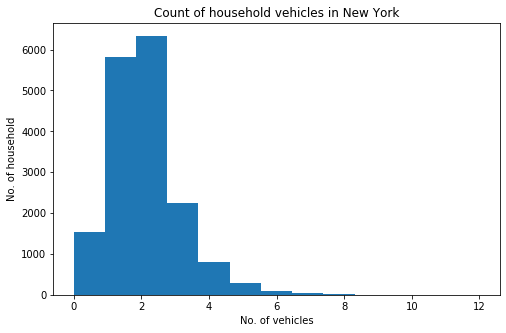

In [10]:
#plot histogram of how many vehicles
x = newyork['HHVEHCNT']
#plt.style.use('ggplot')
plt.figure(figsize=(8, 5))
plt.hist(x, bins = 13)
plt.title('Count of household vehicles in New York')
plt.ylabel('No. of household')
plt.xlabel('No. of vehicles')
plt.show()

In [11]:
#recode vehicle ownership
#bank['GenderDummy_F'] = np.where(bank['Gender'] == "Female", 1, 0)
newyork['ownership'] = np.where(newyork['HHVEHCNT'] == 0, 0, 1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
cols = ['HHVEHCNT','ownership']
#newyork[cols]
newyork[newyork['HHVEHCNT'] == 0]['ownership'].value_counts()

0    1542
Name: ownership, dtype: int64

In [13]:
newyork[newyork['ownership'] != 0]['HHVEHCNT'].value_counts()

2     6334
1     5821
3     2257
4      795
5      281
6       92
7       34
8       12
9        6
12       2
11       2
Name: HHVEHCNT, dtype: int64

In [14]:
newyork.head(5)

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,ownership
2,30000012,5,3,1,1,2,10,1,1,3,...,79.419586,C,80,17000,17000,5000,60,17000,7000,1
8,30000082,3,3,2,4,2,8,1,1,5,...,1148.809332,T,20,1500,300,750,30,750,300,1
15,30000130,1,1,1,2,1,5,-9,1,-9,...,3829.959655,U,60,30000,17000,5000,70,30000,17000,1
39,30000380,2,3,2,3,1,3,1,1,2,...,370.744472,S,50,3000,1500,1500,50,3000,1500,1
44,30000434,7,3,1,2,2,8,1,1,3,...,101.472420,R,30,1500,750,750,30,750,300,1


In [15]:
#household income
newyork['HHFAMINC'].value_counts()

 6     2975
 7     2260
 5     1982
 8     1712
 4     1583
 3     1475
 9      981
 11     967
 10     911
 2      859
 1      827
-7      525
-8      119
-9        2
Name: HHFAMINC, dtype: int64

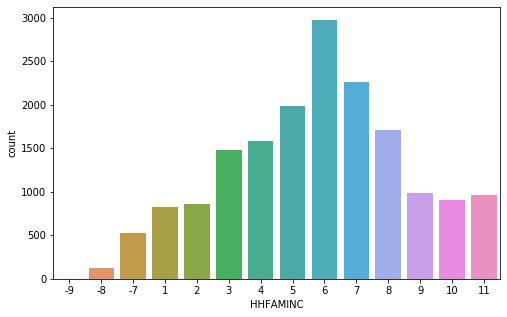

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HHFAMINC', data=newyork)

In [17]:
#income for household with vehicles, '06=$50,000 to $74,999'
newyork[newyork['ownership'] != 0]['HHFAMINC'].value_counts()

 6     2870
 7     2180
 5     1874
 8     1667
 4     1446
 3     1234
 9      961
 11     922
 10     886
 2      610
-7      489
 1      419
-8       76
-9        2
Name: HHFAMINC, dtype: int64

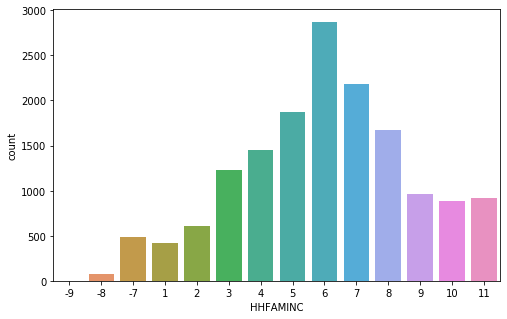

In [18]:
#income for household with vehicles, '06=$50,000 to $74,999'
plt.figure(figsize=(8, 5))
sns.countplot(x='HHFAMINC', data=newyork[newyork['ownership'] != 0])

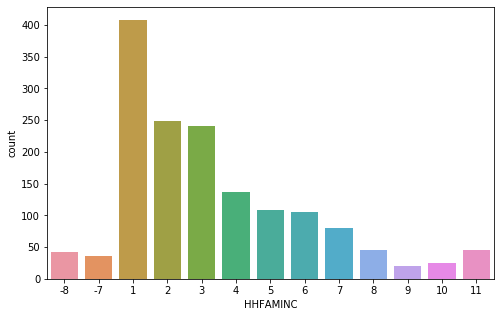

In [19]:
#income for household without vehicles, '01=Less than $10,000'
plt.figure(figsize=(8, 5))
sns.countplot(x='HHFAMINC', data=newyork[newyork['ownership'] == 0])

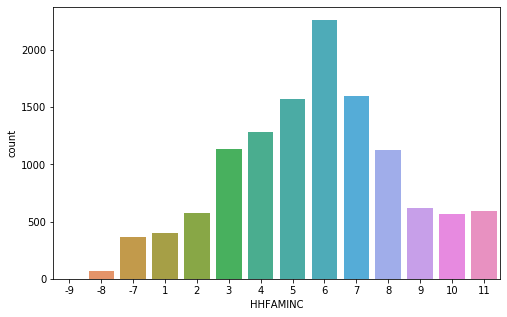

In [20]:
#income for household with 1 or 2 vehicles
plt.figure(figsize=(8, 5))
sns.countplot(x='HHFAMINC', data=newyork[(newyork['HHVEHCNT'] == 1) | (newyork['HHVEHCNT'] == 2)])

In [21]:
count_vehicle = newyork[newyork['HHFAMINC']>0].groupby(by=['HHFAMINC']).mean().reset_index()
count_vehicle.sort_values('HHFAMINC', ascending=True)

,HHFAMINC,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,ownership
0,1,3.545573e+07,3.977025,2.628779,2.649335,1.614268,0.679565,2.193470,2.140266,2.856106,...,1.928658,701.513633,41.074970,6673.777509,4245.905683,1789.073761,43.626360,7314.406288,4760.839178,0.506651
1,2,3.495193e+07,4.193248,2.722934,3.456345,1.562282,0.935972,2.210710,2.300349,2.745052,...,1.926659,460.194766,34.298021,4611.393481,2587.761350,1367.388824,35.718277,5009.356228,2879.088475,0.710128
2,3,3.508064e+07,4.078644,2.750508,2.451525,1.653559,1.201356,2.103729,2.411525,2.831186,...,1.932881,404.133417,30.086780,3790.802034,2245.242712,1149.852881,31.324068,4402.056271,2548.090169,0.836610
3,4,3.512336e+07,3.950726,2.647505,2.500948,1.783955,1.445989,1.777637,2.447884,2.818067,...,1.935565,380.371714,28.802906,3897.163613,2343.404927,1227.012003,28.278585,4356.323437,2608.945041,0.913455
4,5,3.502821e+07,4.016650,2.668012,2.013623,1.856710,1.639758,1.514632,2.022200,2.709889,...,1.935419,335.999806,27.874369,3477.268920,2017.178103,1105.926842,26.761857,3988.293138,2361.956105,0.945510
5,6,3.506291e+07,3.987227,2.583193,1.824202,2.076303,1.890084,1.391261,2.017479,2.705210,...,1.934790,363.744434,26.347227,3714.078319,2263.758992,1150.969076,25.523697,4209.036303,2494.195966,0.964706
6,7,3.512678e+07,3.915487,2.402212,1.680088,2.293363,2.114602,1.264159,1.710177,2.550000,...,1.922124,403.293946,25.177434,3905.201770,2397.701770,1188.276991,23.440708,4340.931858,2702.170796,0.964602
7,8,3.494688e+07,3.945093,2.293808,1.432243,2.464369,2.275117,1.192173,1.522780,2.405374,...,1.936332,380.115128,23.594042,3647.621495,2072.533879,1164.546145,21.216706,4080.448598,2326.622664,0.973715
8,9,3.490857e+07,3.980632,2.137615,1.178389,2.557594,2.357798,1.144750,1.428135,2.387360,...,1.933741,432.656623,23.469929,3789.005097,2255.518858,1208.984709,21.176351,4219.993884,2501.390418,0.979613
9,10,3.497432e+07,4.028540,2.053787,1.164654,2.661910,2.379802,1.121844,1.316136,2.311745,...,1.907794,463.113173,24.060373,4264.944018,2651.771679,1318.401756,20.822173,4613.187706,2809.345774,0.972558


In [22]:
#No. of vehicles proportional to household income and housesize
cols2 = ['HHFAMINC','HHSIZE','HHVEHCNT']
count_vehicle[cols2]

,HHFAMINC,HHSIZE,HHVEHCNT
0,1,1.614268,0.679565
1,2,1.562282,0.935972
2,3,1.653559,1.201356
3,4,1.783955,1.445989
4,5,1.856710,1.639758
5,6,2.076303,1.890084
6,7,2.293363,2.114602
7,8,2.464369,2.275117
8,9,2.557594,2.357798
9,10,2.661910,2.379802


In [23]:
#health
#MEDCOND - Medical Condition 
health = personal[personal['HHSTATE'] =="NY"]
health['HEALTH'].value_counts()

 2    12688
 1    10333
 3     8204
 4     2620
 5      650
-7       18
-8       15
Name: HEALTH, dtype: int64

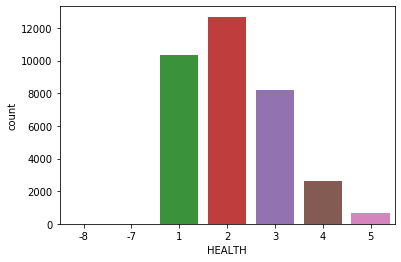

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HEALTH', data=health)

In [25]:
#MEDCOND6 - Medical Condition, How Long
health['MEDCOND'].value_counts() #2 means no

 2    31106
 1     3403
-8       10
-7        9
Name: MEDCOND, dtype: int64

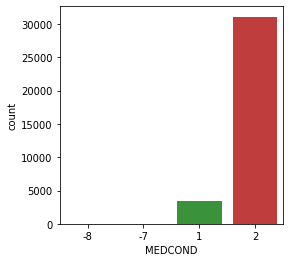

In [26]:
plt.figure(figsize=(4, 4))
sns.countplot(x='MEDCOND', data=health)

In [27]:
#MEDCOND6 - Medical Condition, How Long
health['MEDCOND6'].value_counts() #-1 means Appropriate skip

-1    31125
 2     2821
 3      311
 1      269
-7        2
Name: MEDCOND6, dtype: int64

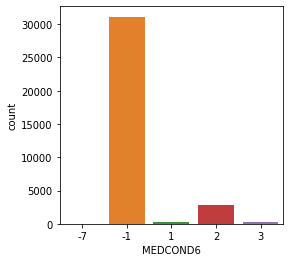

In [28]:
plt.figure(figsize=(4, 4))
sns.countplot(x='MEDCOND6', data=health)

In [29]:
#TRAVDAY - Travel day - day of week
newyork['TRAVDAY'].value_counts()

5    2511
2    2485
7    2467
1    2464
6    2453
3    2407
4    2391
Name: TRAVDAY, dtype: int64

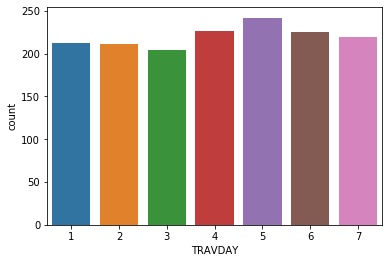

In [30]:
#for those without vehicles, more records from wednesday to saturday
plt.figure(figsize=(6, 4))
sns.countplot(x='TRAVDAY', data=newyork[newyork['ownership'] == 0])

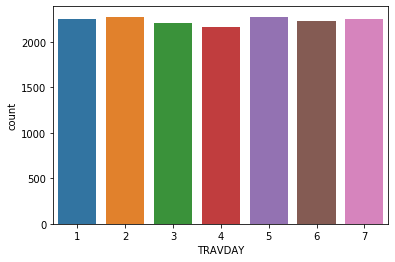

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='TRAVDAY', data=newyork[newyork['ownership'] != 0])

In [32]:
#CNTTDHH - Count of household trips on travel day
newyork['CNTTDHH'].value_counts()

4     1960
0     1744
2     1690
6     1662
5     1323
8     1278
3     1119
7     1027
10     895
9      758
12     648
11     521
14     399
13     359
16     262
15     259
1      193
18     167
17     154
20     118
19     104
21      86
22      74
24      60
23      57
25      43
26      40
27      33
28      29
30      24
29      18
31      13
37      11
32      10
33       9
36       7
34       7
35       3
38       3
39       3
43       3
40       2
62       1
52       1
47       1
Name: CNTTDHH, dtype: int64

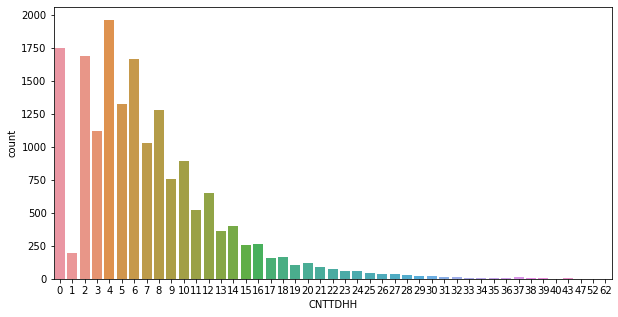

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='CNTTDHH', data=newyork)

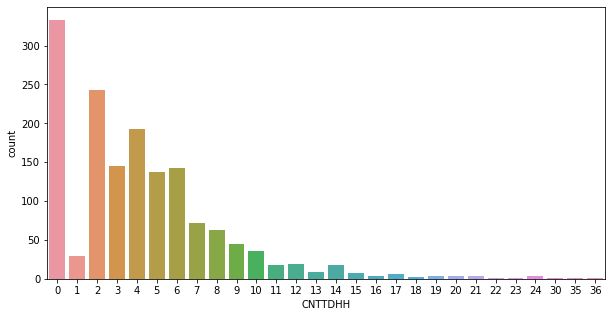

In [34]:
#newyork[newyork['ownership'] == 0], max number is 0
plt.figure(figsize=(10, 5))
sns.countplot(x='CNTTDHH', data=newyork[newyork['ownership'] == 0])

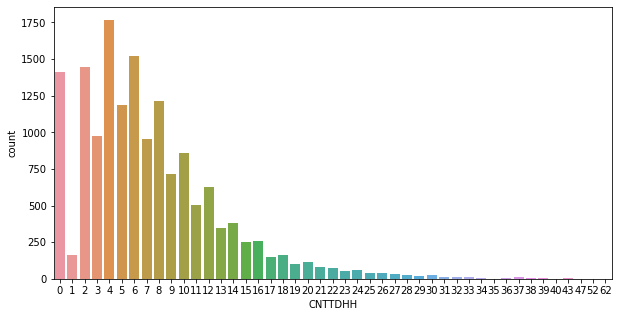

In [35]:
#newyork[newyork['ownership'] == 1], max number is 5
plt.figure(figsize=(10, 5))
sns.countplot(x='CNTTDHH', data=newyork[newyork['ownership'] != 0])

In [36]:
#HOMEOWN - Home Ownership, 1 means own, 2 means rent
newyork['HOMEOWN'].value_counts()

 1     13115
 2      3933
 97      128
-7         2
Name: HOMEOWN, dtype: int64

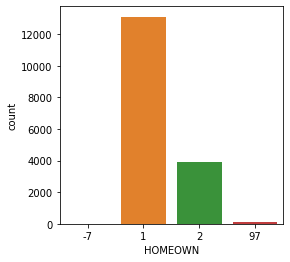

In [37]:
plt.figure(figsize=(4, 4))
sns.countplot(x='HOMEOWN', data=newyork)

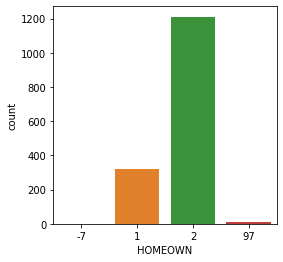

In [38]:
#newyork[newyork['ownership'] == 0], most are rent
plt.figure(figsize=(4, 4))
sns.countplot(x='HOMEOWN', data=newyork[newyork['ownership'] == 0])

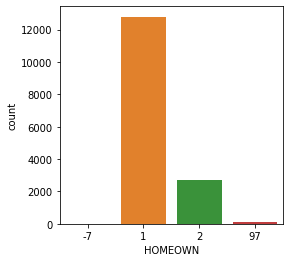

In [39]:
#newyork[newyork['ownership'] == 1], most are own
plt.figure(figsize=(4, 4))
sns.countplot(x='HOMEOWN', data=newyork[newyork['ownership'] == 1])

In [40]:
#HH_RACE - race, 01 = White
newyork['HH_RACE'].value_counts()

 1     15333
 2       672
 3       460
 6       340
 97      199
-7        88
 4        59
 5        14
-8        13
Name: HH_RACE, dtype: int64

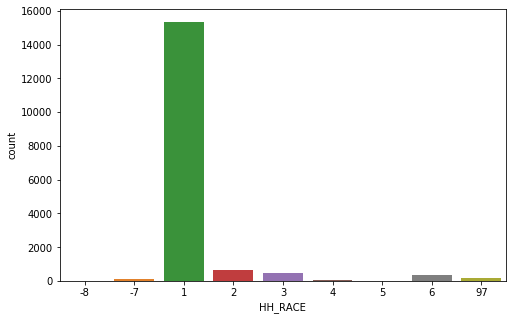

In [41]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HH_RACE', data=newyork)

In [42]:
#HTPPOPDN - Category of population density (persons per square mile) in the census tract of the household's home location
newyork['HTPPOPDN'].value_counts()

 300      3836
 50       3312
 3000     2395
 1500     2255
 7000     2049
 750      1440
 30000     984
 17000     805
-9         102
Name: HTPPOPDN, dtype: int64

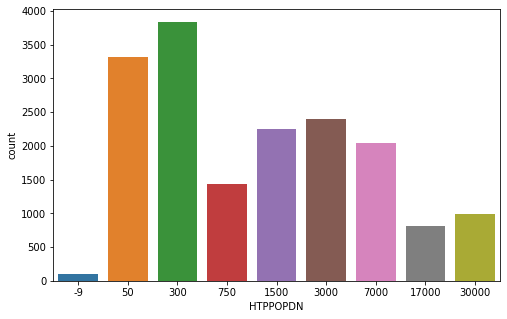

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='HTPPOPDN', data=newyork)

In [44]:
#DRVRCNT - Number of drivers in household
newyork['DRVRCNT'].value_counts()

2    8271
1    6272
3    1194
0    1072
4     317
5      44
6       7
7       1
Name: DRVRCNT, dtype: int64

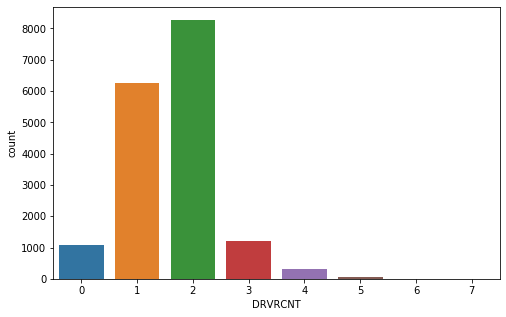

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(x='DRVRCNT', data=newyork)

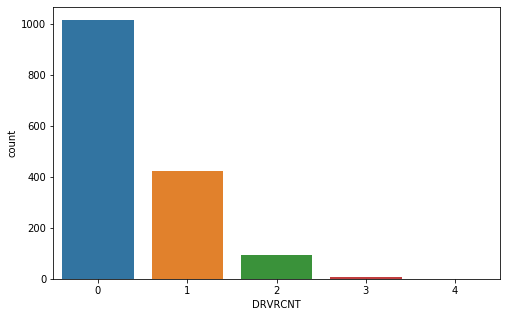

In [46]:
#newyork[newyork['ownership'] == 0]
plt.figure(figsize=(8, 5))
sns.countplot(x='DRVRCNT', data=newyork[newyork['ownership'] == 0])

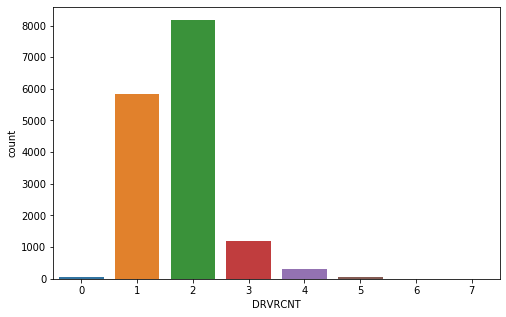

In [47]:
#newyork[newyork['ownership'] == 1]
plt.figure(figsize=(8, 5))
sns.countplot(x='DRVRCNT', data=newyork[newyork['ownership'] == 1])

In [48]:
#NUMADLT - Count of adult household members at least 18 years old
newyork['NUMADLT'].value_counts()

2     9215
1     6152
3     1374
4      358
5       67
6        8
7        2
10       1
8        1
Name: NUMADLT, dtype: int64

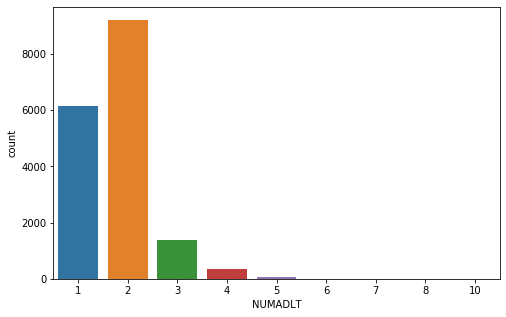

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='NUMADLT', data=newyork)

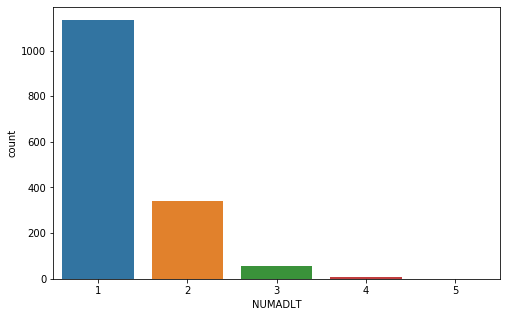

In [50]:
#newyork[newyork['ownership'] == 0]
plt.figure(figsize=(8, 5))
sns.countplot(x='NUMADLT', data=newyork[newyork['ownership'] == 0])

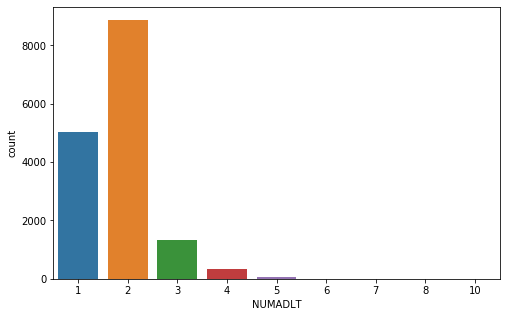

In [51]:
#newyork[newyork['ownership'] == 1]
plt.figure(figsize=(8, 5))
sns.countplot(x='NUMADLT', data=newyork[newyork['ownership'] == 1])

In [52]:
#YOUNGCHILD - Count of persons with an age between 0 and 4 in household
newyork['YOUNGCHILD'].value_counts()

0    16093
1      790
2      267
3       26
5        1
4        1
Name: YOUNGCHILD, dtype: int64

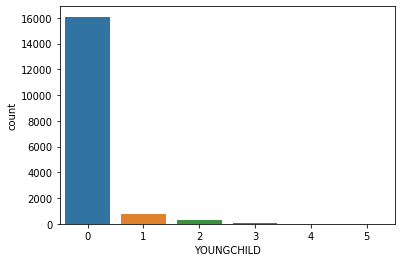

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(x='YOUNGCHILD', data=newyork)

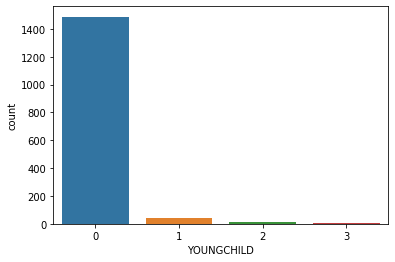

In [54]:
#newyork[newyork['ownership'] == 0], no difference
plt.figure(figsize=(6, 4))
sns.countplot(x='YOUNGCHILD', data=newyork[newyork['ownership'] == 0])

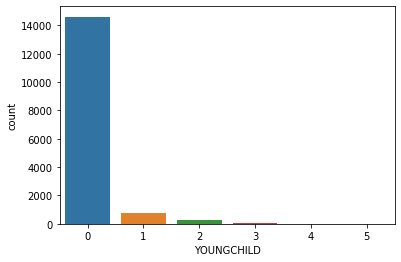

In [55]:
#newyork[newyork['ownership'] == 1]
plt.figure(figsize=(6, 4))
sns.countplot(x='YOUNGCHILD', data=newyork[newyork['ownership'] == 1])

In [56]:
#WRKCOUNT - Number of workers in household
newyork['WRKCOUNT'].value_counts()

0    6280
1    5785
2    4354
3     602
4     143
5      12
7       1
6       1
Name: WRKCOUNT, dtype: int64

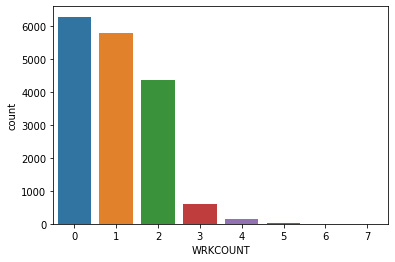

In [57]:
plt.figure(figsize=(6, 4))
sns.countplot(x='WRKCOUNT', data=newyork)

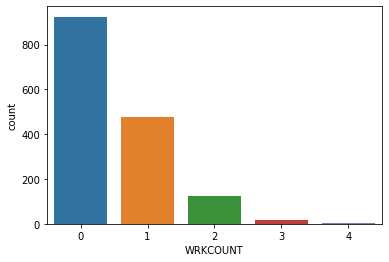

In [58]:
#newyork[newyork['ownership'] == 0]
plt.figure(figsize=(6, 4))
sns.countplot(x='WRKCOUNT', data=newyork[newyork['ownership'] == 0])

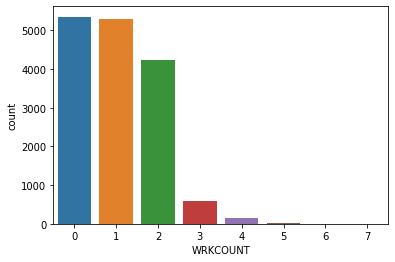

In [59]:
#newyork[newyork['ownership'] == 1]
plt.figure(figsize=(6, 4))
sns.countplot(x='WRKCOUNT', data=newyork[newyork['ownership'] == 1])

In [60]:
#URBRUR - Household in urban/rural area
newyork['URBRUR'].value_counts()

1    11818
2     5360
Name: URBRUR, dtype: int64

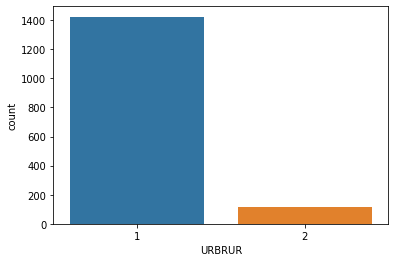

In [61]:
#newyork[newyork['ownership'] == 0]
plt.figure(figsize=(6, 4))
sns.countplot(x='URBRUR', data=newyork[newyork['ownership'] == 0])

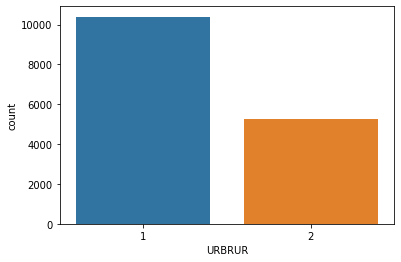

In [62]:
#newyork[newyork['ownership'] == 1]
plt.figure(figsize=(6, 4))
sns.countplot(x='URBRUR', data=newyork[newyork['ownership'] == 1])

In [63]:
#LIF_CYC Life Cycle classification for the household, derived by attributes pertaining to age, relationship, 
#and work status
newyork['LIF_CYC'].value_counts()

10    4296
2     3577
1     3120
9     2649
6     1254
4     1127
8      621
5      267
7      156
3      111
Name: LIF_CYC, dtype: int64

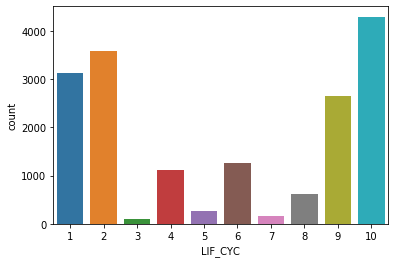

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='LIF_CYC', data=newyork)

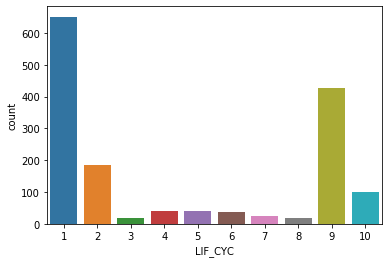

In [65]:
#newyork[newyork['ownership'] == 0], '01=one adult, no childre, 09=one adult, retired, no children'
plt.figure(figsize=(6, 4))
sns.countplot(x='LIF_CYC', data=newyork[newyork['ownership'] == 0])

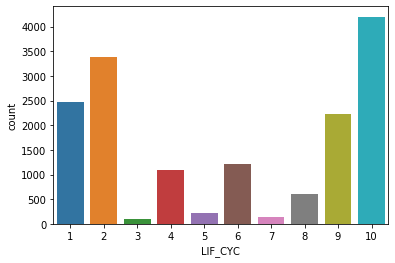

In [66]:
#newyork[newyork['ownership'] == 1], '10=2+ adults, retired, no children, 02=2+ adults, no children
plt.figure(figsize=(6, 4))
sns.countplot(x='LIF_CYC', data=newyork[newyork['ownership'] == 1])

In [67]:
#LPACT - Count of Times of Light or Moderate Physical Activity in Past Week
health['LPACT'].value_counts()

-1     12964
 3      4474
 2      3505
 5      3359
 7      2733
 4      2486
 0      1733
 1      1259
 6       770
 10      358
 21      158
 14      138
-8       124
 20      122
 15      108
 8        90
 12       75
-7        28
 9        16
 16       10
 11       10
 18        4
 13        3
 17        1
Name: LPACT, dtype: int64

In [68]:
personal.head(5)

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,1,67,3,2,1,2,2,6,2,...,2,206.690153,T,50,1500,750,750,20,750,300
1,30000007,2,66,3,2,2,1,2,1,-1,...,2,197.075742,T,50,1500,750,750,20,750,300
2,30000007,3,28,2,2,3,2,2,5,2,...,2,219.514210,T,50,1500,750,750,20,750,300
3,30000008,1,55,5,2,1,1,1,1,-1,...,2,63.185911,R,5,300,300,150,5,300,300
4,30000008,2,49,4,2,2,2,1,1,-1,...,2,58.665911,R,5,300,300,150,5,300,300


In [69]:
personal.shape

(264234, 121)

In [70]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264234 entries, 0 to 264233
Columns: 121 entries, HOUSEID to HBRESDN
dtypes: float64(4), int64(113), object(4)
memory usage: 243.9+ MB


In [71]:
personal.columns.tolist()

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [79]:
newyork_carowner=newyork[newyork['ownership'] != 0]['HOUSEID'].values.tolist()
newyork_no_carowner=newyork[newyork['ownership'] == 0]['HOUSEID'].values.tolist()

In [80]:
NY_personal_car = personal[personal['HOUSEID'].isin(newyork_carowner)]
NY_personal_car

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
5,30000012,1,45,5,2,1,2,1,1,-1,...,2,58.966275,C,80,17000,17000,5000,60,17000,7000
16,30000082,1,39,5,2,1,2,1,1,-1,...,2,1028.814768,T,20,1500,300,750,30,750,300
17,30000082,2,38,4,2,2,1,1,1,-1,...,2,1296.339345,T,20,1500,300,750,30,750,300
27,30000130,1,45,5,2,1,2,1,1,-1,...,1,3705.493904,U,60,30000,17000,5000,70,30000,17000
28,30000130,2,45,4,2,2,1,1,1,-1,...,1,4361.900229,U,60,30000,17000,5000,70,30000,17000
77,30000380,1,52,3,2,1,2,1,4,2,...,2,328.406635,S,50,3000,1500,1500,50,3000,1500
78,30000380,2,46,3,2,2,1,1,1,-1,...,2,386.581928,S,50,3000,1500,1500,50,3000,1500
79,30000380,3,14,1,2,3,1,1,-1,-1,...,2,341.089169,S,50,3000,1500,1500,50,3000,1500
87,30000434,1,67,5,2,1,2,1,97,1,...,2,85.601505,R,30,1500,750,750,30,750,300
88,30000434,2,68,5,2,2,1,1,97,1,...,2,79.971192,R,30,1500,750,750,30,750,300


In [81]:
NY_personal_nocar = personal[personal['HOUSEID'].isin(newyork_no_carowner)]
NY_personal_nocar

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
213,30001053,1,35,3,1,1,2,1,3,2,...,2,559.089917,C,50,7000,3000,1500,50,7000,3000
214,30001053,2,14,1,1,3,2,1,-1,-1,...,2,577.238891,C,50,7000,3000,1500,50,7000,3000
371,30001625,1,53,1,1,1,1,1,3,2,...,2,4809.170179,U,90,30000,30000,5000,80,30000,30000
756,30003393,1,28,3,2,1,2,1,1,-1,...,2,1057.080463,C,60,7000,3000,3000,60,7000,3000
757,30003393,2,58,2,2,4,2,1,1,-1,...,2,932.139291,C,60,7000,3000,3000,60,7000,3000
758,30003393,3,60,2,2,4,1,1,97,2,...,2,1097.262252,C,60,7000,3000,3000,60,7000,3000
1075,30004535,1,30,5,2,1,2,-7,5,2,...,2,94.055504,S,60,300,300,150,60,1500,750
1076,30004535,2,43,5,2,2,1,97,2,1,...,2,118.512928,S,60,300,300,150,60,1500,750
1257,30005283,1,68,1,2,1,1,2,6,2,...,2,162.866271,S,30,1500,300,350,30,1500,300
1519,30006388,1,28,2,2,1,2,1,97,2,...,2,647.376864,-9,-9,-9,-9,-9,-9,-9,-9


In [72]:
personal[personal['HHSTATE'] =="NY"]['HEALTH'].value_counts()

 2    12688
 1    10333
 3     8204
 4     2620
 5      650
-7       18
-8       15
Name: HEALTH, dtype: int64

In [82]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['HEALTH'].value_counts()

 3    658
 2    539
 1    483
 4    414
 5    139
-8      2
-7      1
Name: HEALTH, dtype: int64

In [83]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['HEALTH'].value_counts()

 2    12149
 1     9850
 3     7546
 4     2206
 5      511
-7       17
-8       13
Name: HEALTH, dtype: int64

In [84]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['CARRODE'].value_counts()
#other than skip and not ascertained, most are 1

-1     17866
 1     11122
-9      2077
 2       972
 3       171
 4        38
 5        17
-7         5
-8         5
 7         5
 10        4
 20        4
 8         3
 6         2
 15        1
Name: CARRODE, dtype: int64

In [85]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['CARRODE'].value_counts()
#highest is 2

-1    1534
-9     665
 2      19
 1      11
 3       4
 4       2
 6       1
Name: CARRODE, dtype: int64

In [161]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['WKFMHMXX'].value_counts()

-1     29945
 0       578
 1       268
 2       265
 4       208
 5       208
 3       194
 10      113
 8       106
 15       77
 6        76
 12       47
 7        44
 20       44
 30       22
 9        18
 25       15
 18        9
 14        8
 22        7
 11        7
 24        7
 16        6
 19        4
 13        4
 28        3
 23        3
 21        2
 26        2
-8         1
 17        1
Name: WKFMHMXX, dtype: int64

In [162]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['WKFMHMXX'].value_counts()

-1     2096
 0       40
 2       17
 3       16
 1       16
 4       13
 5       11
 7        5
 10       4
 8        4
 15       3
 6        3
 12       2
 25       1
 14       1
 16       1
 9        1
 11       1
 22       1
Name: WKFMHMXX, dtype: int64

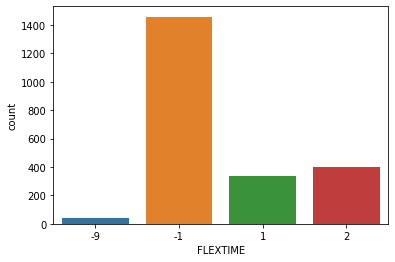

In [91]:
plt.figure(figsize=(6, 4))
sns.countplot(x='FLEXTIME', data=NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"])

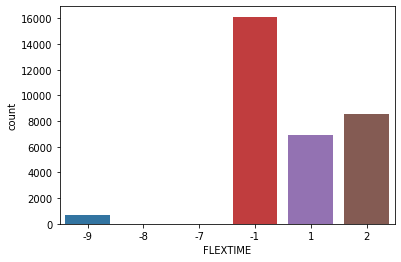

In [92]:
plt.figure(figsize=(6, 4))
sns.countplot(x='FLEXTIME', data=NY_personal_car[NY_personal_car['HHSTATE'] =="NY"])

In [93]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['BIKESHARE'].value_counts()

-1     1985
 0      199
 20       8
 1        7
 30       5
 5        4
 10       4
 12       3
 25       3
 15       2
 3        2
 4        2
 50       2
 6        2
 8        1
 99       1
 16       1
 26       1
 45       1
 40       1
 80       1
 32       1
Name: BIKESHARE, dtype: int64

In [93]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['BIKESHARE'].value_counts()

-1     1985
 0      199
 20       8
 1        7
 30       5
 5        4
 10       4
 12       3
 25       3
 15       2
 3        2
 4        2
 50       2
 6        2
 8        1
 99       1
 16       1
 26       1
 45       1
 40       1
 80       1
 32       1
Name: BIKESHARE, dtype: int64

In [95]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['WRKTIME'].value_counts()

-1          1458
09:00 AM     110
10:00 AM      70
09:30 AM      51
08:00 AM      49
-9            42
08:30 AM      41
07:00 AM      30
08:45 AM      24
11:00 AM      22
07:30 AM      19
09:15 AM      17
07:45 AM      17
08:15 AM      15
12:00 PM      12
04:00 PM      12
10:30 AM      11
03:00 PM      10
02:00 PM      10
05:00 PM      10
06:00 AM       9
01:00 PM       9
09:10 AM       6
07:50 AM       6
-8             6
06:30 AM       6
11:45 AM       5
06:45 AM       5
08:25 AM       5
08:50 AM       5
            ... 
10:10 AM       1
10:25 AM       1
07:45 PM       1
07:10 AM       1
04:44 PM       1
05:20 PM       1
05:40 AM       1
02:38 PM       1
05:25 PM       1
05:00 AM       1
04:45 PM       1
10:00 PM       1
08:55 AM       1
02:45 PM       1
04:15 PM       1
07:40 PM       1
07:18 AM       1
04:05 AM       1
03:52 PM       1
08:05 AM       1
06:35 AM       1
06:15 AM       1
07:03 AM       1
07:53 AM       1
01:15 AM       1
08:58 AM       1
07:39 AM       1
06:10 AM      

In [97]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['WRKTIME'].value_counts()

-1          16126
08:00 AM     2016
09:00 AM     1674
08:30 AM     1160
07:00 AM     1089
07:30 AM     1001
-9            694
10:00 AM      612
07:45 AM      483
06:00 AM      419
06:30 AM      400
09:30 AM      385
08:15 AM      335
08:45 AM      272
06:45 AM      264
07:15 AM      246
11:00 AM      207
-8            192
07:50 AM      166
03:00 PM      156
04:00 PM      139
12:00 PM      130
05:30 AM      126
07:55 AM      126
09:15 AM      124
08:20 AM      119
05:00 AM      119
02:00 PM      107
07:20 AM      105
05:45 AM      100
            ...  
02:45 AM        1
04:35 AM        1
07:04 AM        1
04:57 AM        1
06:29 AM        1
05:38 AM        1
09:58 AM        1
10:38 PM        1
07:34 AM        1
09:20 PM        1
03:20 AM        1
01:35 PM        1
05:58 AM        1
09:35 PM        1
08:39 PM        1
05:37 AM        1
09:53 PM        1
08:58 AM        1
01:37 PM        1
06:05 PM        1
07:26 AM        1
02:12 PM        1
04:59 AM        1
05:48 AM        1
06:37 AM  

In [149]:
#NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['TIMETOWK'].value_counts()
df1 = NY_personal_nocar[(NY_personal_nocar['HHSTATE'] =="NY") & (NY_personal_nocar['TIMETOWK'] !=-1)] #higher
df1['TIMETOWK'].mean()

35.15082956259427

In [154]:
df2 = NY_personal_car[(NY_personal_car['HHSTATE'] =="NY") & (NY_personal_car['TIMETOWK'] !=-1)]
df2['TIMETOWK'].mean()

27.08196007259528

In [102]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['OCCAT'].value_counts() #no diff, prof and sales

-1     1458
 4      373
 1      221
 3       73
 2       71
-9       39
 97       1
Name: OCCAT, dtype: int64

In [103]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['OCCAT'].value_counts()

-1     16126
 4      8533
 1      3296
 3      1877
 2      1782
-9       651
 97       19
-8         5
-7         3
Name: OCCAT, dtype: int64

In [104]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['EDUC'].value_counts() 

 2    610
 3    426
 1    368
 5    345
 4    341
-1    140
-8      5
-7      1
Name: EDUC, dtype: int64

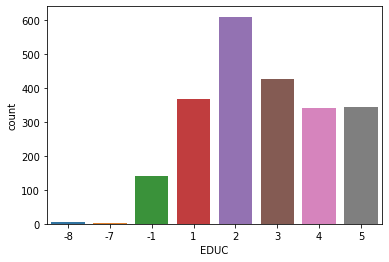

In [107]:
plt.figure(figsize=(6, 4))
sns.countplot(x='EDUC', data=NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"])

In [105]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['EDUC'].value_counts()

 3    7977
 5    7208
 2    6258
 4    6228
-1    2468
 1    2129
-7      15
-8       9
Name: EDUC, dtype: int64

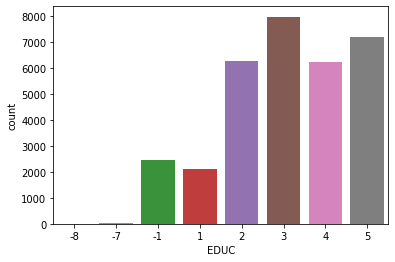

In [108]:
plt.figure(figsize=(6, 4))
sns.countplot(x='EDUC', data=NY_personal_car[NY_personal_car['HHSTATE'] =="NY"])

In [110]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['GT1JBLWK'].value_counts() #no diff

-1    1458
 2     672
 1      67
-9      39
Name: GT1JBLWK, dtype: int64

In [111]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['GT1JBLWK'].value_counts()

-1    16126
 2    13830
 1     1685
-9      651
Name: GT1JBLWK, dtype: int64

In [142]:
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['CNTTDTR'].mean()

2.947674418604651

In [141]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['CNTTDTR'].mean()

3.5183946488294313

In [135]:
#df1 = NY_personal_nocar[(NY_personal_nocar['HHSTATE'] =="NY") & (NY_personal_nocar['DISTTOWK17'] !=-9)]
df1 = NY_personal_nocar[(NY_personal_nocar['HHSTATE'] =="NY")  & (NY_personal_nocar['DISTTOSC17'] !=-9)]
df1['DISTTOSC17'].mean()

26.55969072164927

In [136]:
df2 = NY_personal_car[(NY_personal_car['HHSTATE'] =="NY")  & (NY_personal_car['DISTTOSC17'] !=-9)]
df2['DISTTOSC17'].mean()

5.640704384724062

In [128]:
df1 = NY_personal_nocar[(NY_personal_nocar['HHSTATE'] =="NY") & (NY_personal_nocar['DISTTOWK17'] !=-9)]
df1['DISTTOWK17'].mean() #.value_counts() #no diff

14.6878162650599

In [132]:
df2 = NY_personal_car[(NY_personal_car['HHSTATE'] =="NY") & (NY_personal_car['DISTTOWK17'] !=-9)] #higher
df2['DISTTOWK17'].mean()

22.740744719459435

In [137]:
#11.	HHSIZE 
NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['HHSIZE'].value_counts()

1     1078
2      575
3      277
4      167
5       70
6       22
7       17
8       15
10       8
9        7
Name: HHSIZE, dtype: int64

In [155]:
df1 = NY_personal_nocar[(NY_personal_nocar['HHSTATE'] =="NY")]
df1['HHSIZE'].mean() #.value_counts() #no diff

2.0

In [138]:
NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['HHSIZE'].value_counts()

2     13827
3      5528
4      5029
1      4691
5      2081
6       650
7       274
8       118
9        52
10       36
11        6
Name: HHSIZE, dtype: int64

In [156]:
df2 = NY_personal_car[(NY_personal_car['HHSTATE'] =="NY")]
df2['HHSIZE'].mean()

2.0

In [147]:
#14.	NOCONG 
#NY_personal_nocar[NY_personal_nocar['HHSTATE'] =="NY"]['NOCONG'].value_counts()
df1 = NY_personal_nocar[(NY_personal_nocar['HHSTATE'] =="NY") & (NY_personal_nocar['NOCONG'] !=-1)] #higher
df1['NOCONG'].mean()

18.18918918918919

In [148]:
#NY_personal_car[NY_personal_car['HHSTATE'] =="NY"]['NOCONG'].value_counts()
df2 = NY_personal_car[(NY_personal_car['HHSTATE'] =="NY") & (NY_personal_car['NOCONG'] !=-1)] #higher
df2['NOCONG'].mean()

19.806600339723367